# Случайный лес

### Чтение данных

In [1]:
from notebooks.utils import DataPipeline

In [2]:
data = DataPipeline()
data()

### Модели

In [3]:
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
)
from src.preprocessor import DataType, TargetType
from src.models.sklearn import SklearnModel
from notebooks.utils import ModelsEnsemble, Experiment

In [4]:
train_numpy_data, test_numpy_data = data.preprocess(data_type=DataType.NUMPY)

### Влияние количества деревьев

In [5]:
experiment_n_estimators = Experiment(name="random_forest_n_estimators")

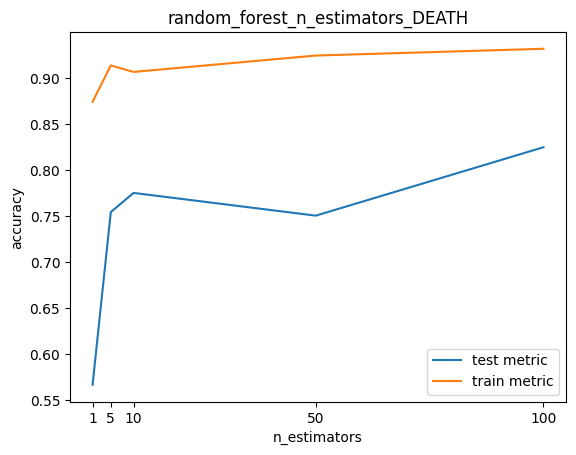

In [6]:
experiment_n_estimators.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.DEATH: RandomForestClassifier},
        parameters={
            TargetType.DEATH: {
                "n_estimators": [1, 5, 10, 50, 100],
                "max_depth": [5] * 5,
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.accuracy,
    x=[1, 5, 10, 50, 100],
    xlabel="n_estimators",
    ylabel="accuracy",
)

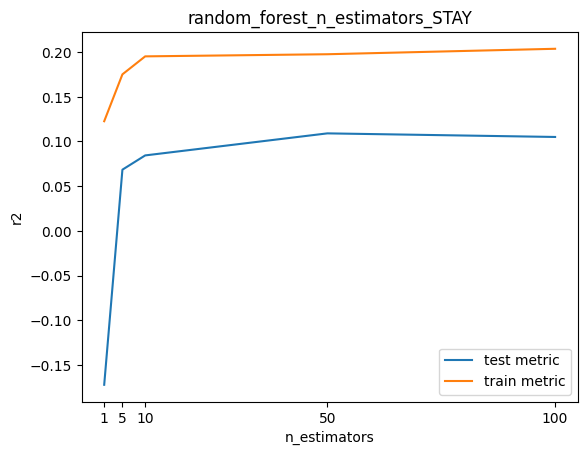

In [7]:
experiment_n_estimators.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.STAY: RandomForestRegressor},
        parameters={
            TargetType.STAY: {
                "n_estimators": [1, 5, 10, 50, 100],
                "max_depth": [5] * 5,
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.r2,
    x=[1, 5, 10, 50, 100],
    xlabel="n_estimators",
    ylabel="r2",
)

### Влияние глубины дерева

In [8]:
experiment_max_depth = Experiment(name="random_forest_max_depth")

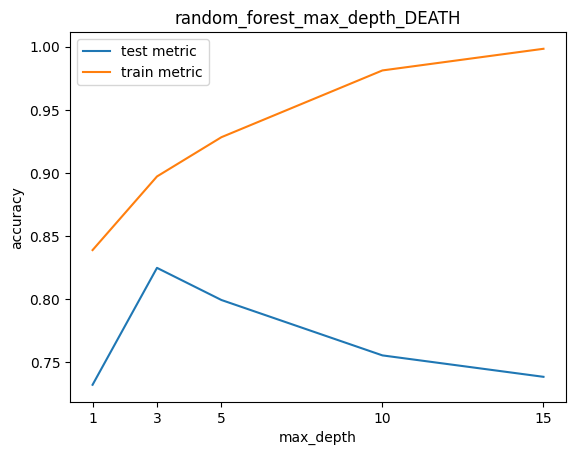

In [9]:
experiment_max_depth.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.DEATH: RandomForestClassifier},
        parameters={
            TargetType.DEATH: {
                "n_estimators": [50] * 5,
                "max_depth": [1, 3, 5, 10, 15],
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.accuracy,
    x=[1, 3, 5, 10, 15],
    xlabel="max_depth",
    ylabel="accuracy",
)

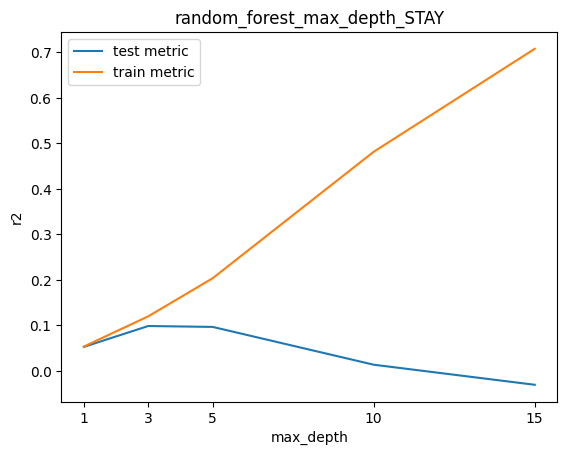

In [10]:
experiment_max_depth.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.STAY: RandomForestRegressor},
        parameters={
            TargetType.STAY: {
                "n_estimators": [50] * 5,
                "max_depth": [1, 3, 5, 10, 15],
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.r2,
    x=[1, 3, 5, 10, 15],
    xlabel="max_depth",
    ylabel="r2",
)